<table align='left'>
        <tr>
            <td>1</td>
            <td>mpg</td>
            <td>Miles/(US) gallon số gallon xăng trên 1 dặm</td>
        </tr>
        <tr>
            <td>2</td>
            <td>cylinders</td>
            <td>Number of cylinders số lượng xilanh</td>
        </tr>
        <tr>
            <td>3</td>
            <td>displacement</td>
            <td>Displacement (cu.in.)</td>
        </tr>
        <tr>
            <td>4</td>
            <td>horsepower</td>
            <td>Gross horsepower công suất theo mã lực</td>
        </tr>
        <tr>
            <td>5</td>
            <td>weight</td>
            <td>Weight (1000 lbs) trọng lượng (pound)</td>
        </tr>
        <tr>
            <td>6</td>
            <td>acceleration</td>
            <td>Gia tốc</td>
        </tr>
        <tr>
            <td>7</td>
            <td>model_year</td>
            <td>Năm sản xuất</td>
        </tr>
        <tr>
            <td>8</td>
            <td>origin</td>
            <td>Xuất xứ</td>
        </tr>
    <tr>
            <td>9</td>
            <td>name</td>
            <td>Tên dòng xe</td>
        </tr>
    </table>

# Mức tiêu hao nhiên liệu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## 1.ĐỌC DỮ LIỆU

In [2]:
df = pd.read_csv('mpg.csv')

In [5]:
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


## 2. TÌM HIỂU DỮ LIỆU

### Kiểm tra kích thước dữ liệu

In [7]:
df.shape

(398, 9)

### Kiểm tra các giá trị phân biệt

In [9]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

### Kiểm tra có dòng nào không có dữ liệu?

In [6]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

### Xóa các dòng không có dữ liệu


In [7]:
df.dropna(inplace=True)

In [11]:
df.shape

(392, 9)

### Tìm trung binh, trung vị của các thuộc tính: 'cylinders', 'horsepower', 'weight'

In [11]:
df.describe()[['cylinders', 'horsepower', 'weight']].loc[['mean', '50%']]

,cylinders,horsepower,weight
mean,5.471939,104.469388,2977.584184
50%,4.000000,93.500000,2803.500000


### Tìm miền giá trị và miền phân vị của thuộc tính 'mpg'

In [19]:
print('mpg, miền giá trị:', df['mpg'].max() - df['mpg'].min())
print('mpg, miền phân vị:', df['mpg'].quantile(0.75) - df['mpg'].quantile(0.25))

mpg, miền giá trị: 37.6
mpg, miền phân vị: 12.0


## 3. SO SÁNH MỨC TIÊU HAO NHIÊN LIỆU TRUNG BÌNH CỦA CÁC DÒNG XE

In [30]:
mpg_origin = df[['origin', 'mpg']].groupby('origin').mean().reset_index().sort_values(by=['mpg'])
mpg_origin

,origin,mpg
2,usa,20.033469
0,europe,27.602941
1,japan,30.450633


### Vẽ bằng bar chart

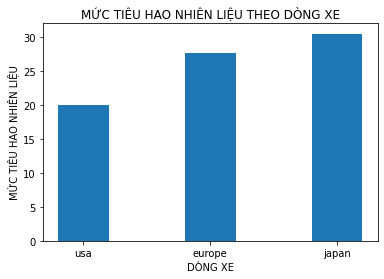

In [40]:
plt.bar(mpg_origin['origin'], mpg_origin['mpg'], width=0.4)
plt.xlabel('DÒNG XE')
plt.ylabel('MỨC TIÊU HAO NHIÊN LIỆU')
plt.title('MỨC TIÊU HAO NHIÊN LIỆU THEO DÒNG XE')
plt.show()

### Vẽ bằng bar chart nằm ngang

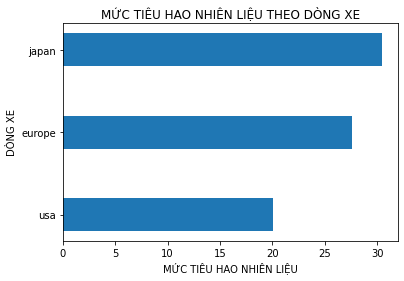

In [45]:
plt.barh(mpg_origin['origin'], mpg_origin['mpg'], height=0.4)
plt.xlabel('MỨC TIÊU HAO NHIÊN LIỆU')
plt.ylabel('DÒNG XE')
plt.title('MỨC TIÊU HAO NHIÊN LIỆU THEO DÒNG XE')
plt.show()

### Vẽ bằng seaborn

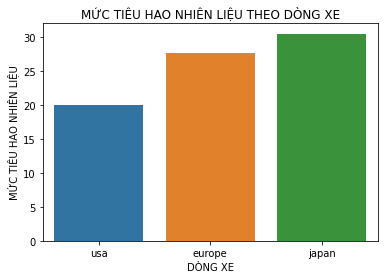

In [49]:
sb.barplot(x='origin', y='mpg', data=mpg_origin)
plt.xlabel('DÒNG XE')
plt.ylabel('MỨC TIÊU HAO NHIÊN LIỆU')
plt.title('MỨC TIÊU HAO NHIÊN LIỆU THEO DÒNG XE')
plt.show()

## 4. VẼ HISTOGRAM TRỌNG LƯỢNG CÁC XE

### Vẽ bằng pyplot

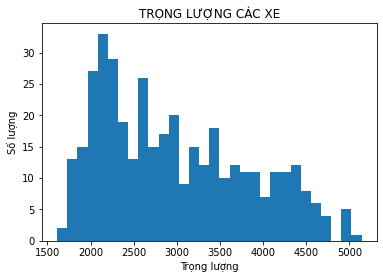

In [56]:
plt.hist(df['weight'], bins=30)
plt.xlabel('Trọng lượng')
plt.ylabel('Số lượng')
plt.title('TRỌNG LƯỢNG CÁC XE')
plt.show()

### Vẽ bằng seaborn

Text(0.5, 1.0, 'TRỌNG LƯỢNG CÁC XE')

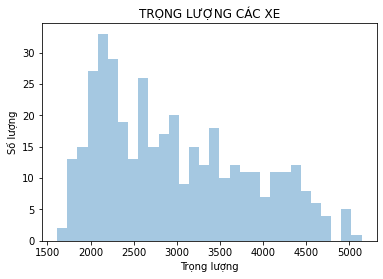

In [61]:
sb.distplot(df['weight'], kde=False, bins=30)
plt.xlabel('Trọng lượng')
plt.ylabel('Số lượng')
plt.title('TRỌNG LƯỢNG CÁC XE')

## 6. VẼ BOXPLOT SO SÁNH CÔNG SUẤT CỦA CÁC DÒNG XE THẬP NIÊN 70, 80

In [66]:
congsuat_xe_7x = df.loc[(df['model_year']>=70) & (df['model_year']<=80), 'horsepower']
congsuat_xe_8x = df.loc[(df['model_year']>=80) & (df['model_year']<=90), 'horsepower']

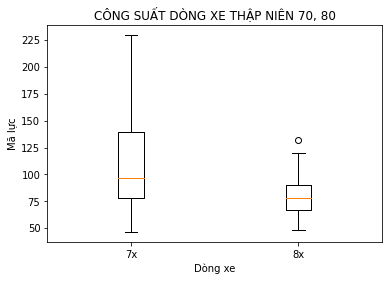

In [70]:
congsuat = [congsuat_xe_7x, congsuat_xe_8x]
plt.boxplot(congsuat, labels=['7x', '8x'])
plt.xlabel('Dòng xe')
plt.ylabel('Mã lực')
plt.title('CÔNG SUẤT DÒNG XE THẬP NIÊN 70, 80')
plt.show()

## 7. KHẢO SÁT MỨC TIÊU HAO NHIÊN LIỆU

### 7.1 Với số lượng xi lanh

Thử vẽ bằng đồ thị scatter plot.

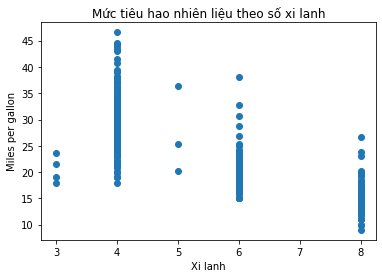

In [12]:
plt.scatter(df['cylinders'], df['mpg'])
plt.title('Mức tiêu hao nhiên liệu theo số xi lanh')
plt.xlabel('Xi lanh')
plt.ylabel('Miles per gallon')
plt.show()

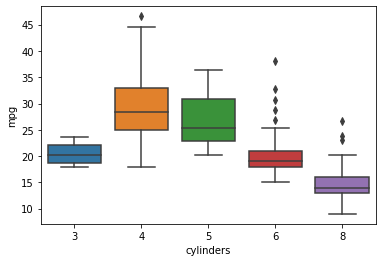

In [14]:
sb.boxplot(x='cylinders', y='mpg', data=df)
plt.show()

### 7.2 Với công suất theo mã lực

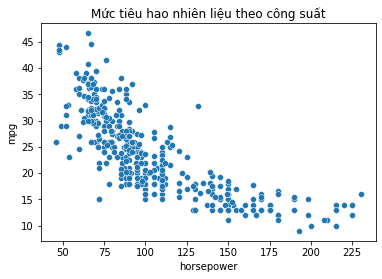

In [21]:
sb.scatterplot(x='horsepower',y='mpg',data=df)
plt.title('Mức tiêu hao nhiên liệu theo công suất')
plt.show()

### 7.3 Với gia tốc

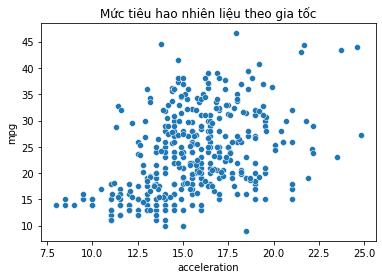

In [22]:
sb.scatterplot(x='acceleration', y='mpg', data=df)
plt.title('Mức tiêu hao nhiên liệu theo gia tốc')
plt.show()

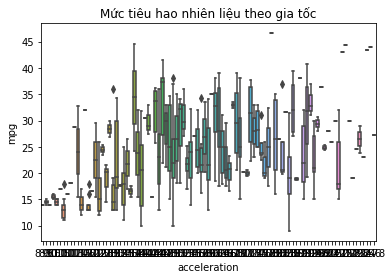

In [26]:
# Không khả thi
sb.boxplot(x='acceleration', y='mpg', data=df)
plt.title('Mức tiêu hao nhiên liệu theo gia tốc')
plt.show()

### 7.4 Với năm sản xuất

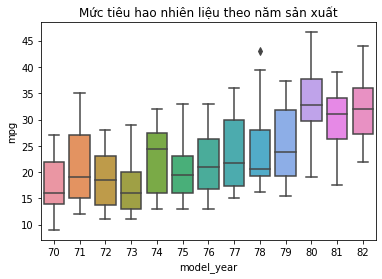

In [17]:
sb.boxplot(x='model_year', y='mpg', data=df)
plt.title('Mức tiêu hao nhiên liệu theo năm sản xuất')
plt.show()